# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [84]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [86]:
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [88]:
sinasc_lat = sinasc_raw[['munResLat', 'IDADEMAE']]

In [90]:
sinasc_lat['munResLat'].max()

-8.76889

In [92]:
latidude_faixas = pd.cut(sinasc_lat['munResLat'], [-13.49976,-10.5,-8])

In [94]:
sinasc_raw.groupby(latidude_faixas).agg({'IDADEMAE':['mean','min','max','median'], 'QTDFILVIVO':['mean','min','max','median']})

C:\Users\carlo\AppData\Local\Temp\ipykernel_2544\1823436.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sinasc_raw.groupby(latidude_faixas).agg({'IDADEMAE':['mean','min','max','median'], 'QTDFILVIVO':['mean','min','max','median']})


IDADEMAE                QTDFILVIVO                  
                     mean min max median       mean  min   max median
munResLat                                                            
(-13.5, -10.5]  26.179819  12  53   26.0   0.981373  0.0  30.0    1.0
(-10.5, -8.0]   26.014964  11  52   25.0   1.129317  0.0  12.0    1.0

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [97]:
sinasc_raw['munResArea'].max()

34096.394

In [99]:
sinasc_municip = sinasc_raw[['munResArea', 'IDADEMAE']]
faixa_municip = pd.cut(sinasc_municip['munResArea'], [455,3000,35000])
sinasc_raw.groupby(faixa_municip).agg({'IDADEPAI': ['mean','min','max','median','std','var'], 'QTDFILMORT': ['mean','min','max','median','std','var']})


C:\Users\carlo\AppData\Local\Temp\ipykernel_2544\843507913.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sinasc_raw.groupby(faixa_municip).agg({'IDADEPAI': ['mean','min','max','median','std','var'], 'QTDFILMORT': ['mean','min','max','median','std','var']})


IDADEPAI                                         QTDFILMORT  \
                    mean   min   max median       std        var       mean   
munResArea                                                                    
(455, 3000]    31.092792  16.0  69.0   30.0  7.675474  58.912900   0.244803   
(3000, 35000]  31.094014  15.0  86.0   30.0  7.818364  61.126809   0.272116   

                                                     
               min   max median       std       var  
munResArea                                           
(455, 3000]    0.0   4.0    0.0  0.551215  0.303838  
(3000, 35000]  0.0  28.0    0.0  0.629081  0.395743

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [102]:
sinasc_raw['munResAlt'].mean()

179.11199911199913

In [104]:
sinasc_raw['munResAlt'].min()

85.0

In [106]:
sinasc_raw['munResAlt'].max()

595.0

In [108]:
sinasc_muni2 = sinasc_raw[['munResAlt', 'IDADEMAE']]
faixa2 = pd.cut(sinasc_muni2['munResAlt'],[84, 179,600])
sinasc_raw.groupby(faixa2).agg({'PESO': ['mean', 'min', 'max', 'median', 'std', 'var'], 'CONSULTAS': ['mean', 'min', 'max', 'median', 'std', 'var']})

C:\Users\carlo\AppData\Local\Temp\ipykernel_2544\846110014.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sinasc_raw.groupby(faixa2).agg({'PESO': ['mean', 'min', 'max', 'median', 'std', 'var'], 'CONSULTAS': ['mean', 'min', 'max', 'median', 'std', 'var']})


PESO                                                \
                   mean  min   max  median         std            var   
munResAlt                                                               
(84, 179]   3248.995092  292  5480  3275.0  548.400155  300742.729992   
(179, 600]  3229.072780  258  5985  3260.0  535.587126  286853.569524   

           CONSULTAS                                     
                mean min max median       std       var  
munResAlt                                                
(84, 179]   3.514932   1   9    4.0  0.842417  0.709666  
(179, 600]  3.726280   1   9    4.0  0.612697  0.375398

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [111]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

In [113]:
sinasc_raw['munResNome'].value_counts()

munResNome
Porto Velho                  8437
Ji-Paraná                    2182
Ariquemes                    1729
Vilhena                      1590
Cacoal                       1374
Rolim de Moura                927
Jaru                          881
Guajará-Mirim                 781
Ouro Preto do Oeste           631
Pimenta Bueno                 616
Buritis                       583
Machadinho D'Oeste            500
Espigão D'Oeste               450
Nova Mamoré                   432
Alta Floresta D'Oeste         367
São Miguel do Guaporé         353
Candeias do Jamari            337
Presidente Médici             304
São Francisco do Guaporé      303
Nova Brasilândia D'Oeste      261
Cerejeiras                    237
Costa Marques                 233
Alto Paraíso                  226
Colorado do Oeste             214
Alvorada D'Oeste              205
Cujubim                       205
Monte Negro                   199
Urupá                         170
Seringueiras                  168
Cam

In [115]:
sinasc_teste = sinasc_raw.set_index('munResNome')

In [117]:
sinasc_teste.groupby(imediatas).agg({'IDADEMAE': 'mean'})

,IDADEMAE
munResNome,
Ariquemes,25.459635
Cacoal,26.347817
Jaru,25.708853
Ji-Paraná,26.094720
Porto Velho,26.166303
Vilhena,26.417143


In [119]:
sinasc_teste['regiao_imediata'] = sinasc_teste.index.map(imediatas)

In [121]:
sinasc_teste = sinasc_teste.set_index('regiao_imediata')

In [123]:
sinasc_teste

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,PARIDADE,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResUf,munResLat,munResLon,munResAlt,munResArea
regiao_imediata,,,,,,,,,,,,,,,,,,,,,
Cacoal,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,0,5,1,ATIVO,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025
Cacoal,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,1,5,2,ATIVO,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025
Cacoal,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,1,5,3,ATIVO,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025
Cacoal,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,0,4,4,ATIVO,MUNIC,Rondônia,-12.13178,-61.85308,397.0,3958.273
Cacoal,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,1,5,5,ATIVO,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vilhena,1,2604388.0,510340,1,32,2.0,12 anos ou mais,333115.0,1.0,0.0,...,1,5,2767632,ATIVO,MUNIC,Rondônia,-12.74137,-60.13858,595.0,11518.915
Vilhena,1,2752654.0,510675,1,19,1.0,8 a 11 anos,999992.0,0.0,0.0,...,0,5,2772678,ATIVO,MUNIC,Rondônia,-12.55684,-60.90185,340.0,5126.723
Vilhena,1,9659366.0,510787,1,24,2.0,8 a 11 anos,421125.0,0.0,1.0,...,1,5,2776905,ATIVO,MUNIC,Rondônia,-12.74137,-60.13858,595.0,11518.915


In [125]:
sinasc_teste['media_acumulada'] = sinasc_teste.groupby('regiao_imediata')['IDADEMAE'].transform(lambda x: x.expanding().mean())

In [127]:
sinasc_teste['DTNASC'] = pd.to_datetime(sinasc_teste['DTNASC'])

In [129]:
sinasc_teste['DTNASC'].value_counts()

DTNASC
2019-04-10    116
2019-03-21    109
2019-09-25    108
2019-09-02    105
2019-12-04    104
             ... 
2019-12-25     44
2019-02-09     44
2019-07-28     44
2019-08-04     43
2019-11-03     40
Name: count, Length: 365, dtype: int64

In [135]:
media_diaria 

,regiao_imediata,DTNASC,IDADEMAE,media_acumulada
0,Ariquemes,2019-01-01,23.200000,23.200000
1,Ariquemes,2019-01-02,26.166667,24.683333
2,Ariquemes,2019-01-03,24.142857,24.503175
3,Ariquemes,2019-01-04,24.666667,24.544048
4,Ariquemes,2019-01-05,22.888889,24.213016
...,...,...,...,...
2176,Vilhena,2019-12-27,27.000000,26.249666
2177,Vilhena,2019-12-28,22.666667,26.239769
2178,Vilhena,2019-12-29,24.250000,26.234287
2179,Vilhena,2019-12-30,26.600000,26.235292


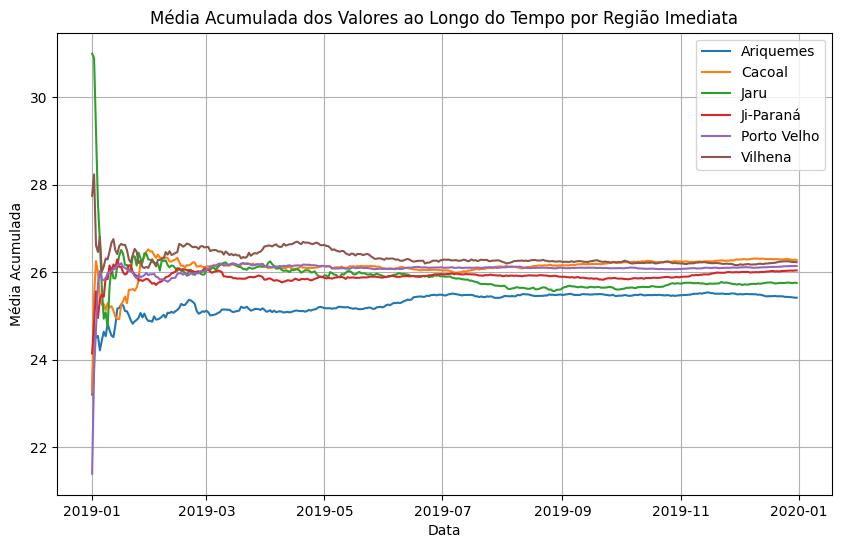

In [133]:
# Agrupar por 'regiao_imediata' e 'data' para calcular a média diária
media_diaria = sinasc_teste.groupby(['regiao_imediata', 'DTNASC']).agg({'IDADEMAE': 'mean'}).reset_index()

# Calcular a média acumulada para cada região imediata
media_diaria['media_acumulada'] = media_diaria.groupby('regiao_imediata')['IDADEMAE'].expanding().mean().reset_index(level=0, drop=True)

# Criando o gráfico com uma linha para cada região imediata
plt.figure(figsize=(10, 6))
for regiao, grupo in media_diaria.groupby('regiao_imediata'):
    plt.plot(grupo['DTNASC'], grupo['media_acumulada'], linestyle='-', label=regiao)

plt.xlabel('Data')
plt.ylabel('Média Acumulada')
plt.title('Média Acumulada dos Valores ao Longo do Tempo por Região Imediata')
plt.legend()
plt.grid(True)
plt.show()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [137]:
arquivo3 = pd.read_csv('dados_extras_ro2.csv',sep=';')
df2 = pd.DataFrame(arquivo3)
df2

,municipio,regiao,idh,ifdm,pib
0,Alta Floresta D'Oeste,Cacoal,0.641,0.6337,496000
1,Alto Alegre dos Parecis,Cacoal,0.592,0.5046,213410
2,Alto Paraíso,Ariquemes,0.625,0.5735,358000
3,Alvorada D'Oeste,Ji-Paraná,0.643,0.5919,204098
4,Ariquemes,Ariquemes,0.702,0.7746,2579830
5,Buritis,Ariquemes,0.616,0.6199,726000
6,Cabixi,Vilhena,0.650,0.5887,113031
7,Cacaulândia,Ariquemes,0.646,0.5721,116635
8,Cacoal,Cacoal,0.718,0.7111,2261644
9,Campo Novo de Rondônia,Ariquemes,0.593,0.5272,208821


In [139]:
print(df2['idh'].min())
print(df2['idh'].max())
print(df2['idh'].mean())

0.584
0.736
0.6440384615384617


In [157]:
sinasc_teste2 = sinasc_raw.set_index('munResNome')
sinasc_teste2 = sinasc_teste2.sort_index()
sinasc_teste2

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,PARIDADE,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResUf,munResLat,munResLon,munResAlt,munResArea
munResNome,,,,,,,,,,,,,,,,,,,,,
Alta Floresta D'Oeste,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,0,5,1,ATIVO,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025
Alta Floresta D'Oeste,1,2495228.0,110028,1,23,2.0,12 anos ou mais,621005.0,2.0,0.0,...,1,2,1491275,ATIVO,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025
Alta Floresta D'Oeste,1,2495228.0,110028,1,25,1.0,8 a 11 anos,621005.0,0.0,0.0,...,0,5,1491260,ATIVO,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025
Alta Floresta D'Oeste,1,2495228.0,110028,1,19,5.0,8 a 11 anos,514120.0,0.0,0.0,...,0,5,1491250,ATIVO,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025
Alta Floresta D'Oeste,1,2495228.0,110028,1,21,2.0,8 a 11 anos,512120.0,0.0,0.0,...,0,5,1491236,ATIVO,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vilhena,1,2798484.0,110030,1,25,2.0,8 a 11 anos,354705.0,1.0,0.0,...,1,5,1492466,ATIVO,MUNIC,Rondônia,-12.74137,-60.13858,595.0,11518.915
Vilhena,1,2798484.0,110030,1,26,1.0,8 a 11 anos,999992.0,0.0,0.0,...,0,5,1492465,ATIVO,MUNIC,Rondônia,-12.74137,-60.13858,595.0,11518.915
Vilhena,1,2798484.0,110030,1,26,1.0,4 a 7 anos,512120.0,2.0,0.0,...,1,5,1492464,ATIVO,MUNIC,Rondônia,-12.74137,-60.13858,595.0,11518.915


In [ ]:
sinasc_teste2 = sinasc_teste2.drop(index='Município ignorado - RO')


In [237]:
result = sinasc_teste2.groupby('munResNome').agg({'IDADEMAE': 'mean'}).reset_index()
result.rename(columns={'IDADEMAE': 'media_idade_mae'}, inplace=True)

In [245]:
result2 = sinasc_teste2.groupby('munResNome').agg({'IDADEMAE': 'min'}).reset_index()
result2.rename(columns={'IDADEMAE': 'min_idade_mae'}, inplace=True)

In [247]:
result3 = sinasc_teste2.groupby('munResNome').agg({'IDADEMAE': 'max'}).reset_index()
result3.rename(columns={'IDADEMAE': 'max_idade_mae'}, inplace=True)

In [239]:
result

,munResNome,media_idade_mae
0,Alta Floresta D'Oeste,25.991826
1,Alto Alegre dos Parecis,24.844156
2,Alto Paraíso,24.960177
3,Alvorada D'Oeste,25.770732
4,Ariquemes,25.607866
5,Buritis,25.559177
6,Cabixi,26.037500
7,Cacaulândia,25.546667
8,Cacoal,26.890102
9,Campo Novo de Rondônia,24.825301


In [249]:
df2['mean_IDADEMAE'] = result['media_idade_mae']
df2['min_IDADEMAE'] = result2['min_idade_mae']
df2['max_IDADEMAE'] = result3['max_idade_mae']

In [257]:
df2.drop(['media_IDADEMAE','mia_IDADEMAE'], axis=1, inplace = True)

In [259]:
df2

,municipio,regiao,idh,ifdm,pib,max_IDADEMAE,mean_IDADEMAE,min_IDADEMAE
0,Alta Floresta D'Oeste,Cacoal,0.641,0.6337,496000,53,25.991826,14
1,Alto Alegre dos Parecis,Cacoal,0.592,0.5046,213410,41,24.844156,14
2,Alto Paraíso,Ariquemes,0.625,0.5735,358000,42,24.960177,11
3,Alvorada D'Oeste,Ji-Paraná,0.643,0.5919,204098,44,25.770732,15
4,Ariquemes,Ariquemes,0.702,0.7746,2579830,44,25.607866,13
5,Buritis,Ariquemes,0.616,0.6199,726000,44,25.559177,14
6,Cabixi,Vilhena,0.650,0.5887,113031,39,26.037500,13
7,Cacaulândia,Ariquemes,0.646,0.5721,116635,42,25.546667,16
8,Cacoal,Cacoal,0.718,0.7111,2261644,47,26.890102,14
9,Campo Novo de Rondônia,Ariquemes,0.593,0.5272,208821,40,24.825301,13


In [277]:
faixa_idh = pd.cut(df2['idh'],[0.580, 0.644,0.737])
df2.pivot_table(values='pib',index = ['mean_IDADEMAE', faixa_idh,'municipio']).sort_values(by='pib', ascending=False)

C:\Users\carlo\AppData\Local\Temp\ipykernel_2544\4190296698.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df2.pivot_table(values='pib',index = ['mean_IDADEMAE', faixa_idh,'municipio']).sort_values(by='pib', ascending=False)


,,,pib
mean_IDADEMAE,idh,municipio,
26.312670,"(0.644, 0.737]",Porto Velho,17912070.0
26.361137,"(0.644, 0.737]",Ji-Paraná,3783972.0
26.433962,"(0.644, 0.737]",Vilhena,2831175.0
25.607866,"(0.644, 0.737]",Ariquemes,2579830.0
26.890102,"(0.644, 0.737]",Cacoal,2261644.0
25.982974,"(0.644, 0.737]",Jaru,1500890.0
26.600863,"(0.644, 0.737]",Rolim de Moura,1283434.0
25.199675,"(0.644, 0.737]",Pimenta Bueno,1164877.0
25.462228,"(0.644, 0.737]",Guajará-Mirim,893000.0


### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [34]:
print(df2['ifdm'].max())
print(df2['ifdm'].min())
print(df2['ifdm'].mean())

0.7746
0.4562
0.6081403846153847


In [281]:
faixa_ifdm = pd.cut(df2['ifdm'], [0.45, 0.6, 0.775])
df2.pivot_table(values='pib', index=['max_IDADEMAE',faixa_ifdm]).sort_values(by='pib', ascending=False)

C:\Users\carlo\AppData\Local\Temp\ipykernel_2544\1972861235.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df2.pivot_table(values='pib', index=['max_IDADEMAE',faixa_ifdm]).sort_values(by='pib', ascending=False)


,,pib
max_IDADEMAE,ifdm,
47,"(0.6, 0.775]",5.418398e+06
46,"(0.6, 0.775]",2.831175e+06
44,"(0.6, 0.775]",1.605873e+06
45,"(0.6, 0.775]",1.024445e+06
43,"(0.45, 0.6]",5.406090e+05
53,"(0.6, 0.775]",5.015000e+05
41,"(0.6, 0.775]",3.683113e+05
51,"(0.45, 0.6]",3.600000e+05
44,"(0.45, 0.6]",3.483878e+05


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [52]:
print(df2['pib'].min())
print(df2['pib'].max())
print(df2['pib'].mean())

52908
17912070
879585.8269230769


In [68]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   municipio  52 non-null     object 
 1   regiao     52 non-null     object 
 2   idh        52 non-null     float64
 3   ifdm       52 non-null     float64
 4   pib        52 non-null     int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 2.2+ KB


In [273]:
faixa_pib = pd.cut(df2['pib'], [52908,879585,17912070])
df2.pivot_table(values='idh', index = ['min_IDADEMAE',faixa_pib]).sort_values(by='min_IDADEMAE',ascending=False)

C:\Users\carlo\AppData\Local\Temp\ipykernel_2544\2469312764.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df2.pivot_table(values='idh', index = ['min_IDADEMAE',faixa_pib]).sort_values(by='min_IDADEMAE',ascending=False)


idh
min_IDADEMAE pib                         
17           (52908, 879585]     0.635667
16           (52908, 879585]     0.627200
15           (52908, 879585]     0.639200
14           (52908, 879585]     0.631412
             (879585, 17912070]  0.716333
13           (52908, 879585]     0.617400
             (879585, 17912070]  0.689667
12           (52908, 879585]     0.611000
             (879585, 17912070]  0.713000
11           (52908, 879585]     0.625000

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

In [ ]:
# A idade média da mãe tem uma pequena relação com o idh, sendo que municipios com maior IDH tendem a ter uma média de idade mais elevada.
# A mesma coisa vale para o IFDM, onde a idade máxima da mãe esta relacionada com maiores valores de ifdm
# E a idade mínima da mãe também esta relacionada com o pib, pib menores apresentam uma idade menor para a mãe